In [1]:
print("hello world")

hello world


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [2]:
df = pd.read_csv(r"D:\complaints.csv", low_memory=False, nrows=200000)
print("Sample shape:", df.shape)
print(df.head())

Sample shape: (200000, 18)
  Date received                                            Product  \
0    2020-07-06  Credit reporting, credit repair services, or o...   
1    2025-09-24  Credit reporting or other personal consumer re...   
2    2019-12-26                        Credit card or prepaid card   
3    2020-05-08  Credit reporting, credit repair services, or o...   
4    2025-09-23  Credit reporting or other personal consumer re...   

                                  Sub-product  \
0                            Credit reporting   
1                            Credit reporting   
2  General-purpose credit card or charge card   
3                            Credit reporting   
4                            Credit reporting   

                                               Issue  \
0               Incorrect information on your report   
1               Incorrect information on your report   
2  Advertising and marketing, including promotion...   
3               Incorrect informa

In [3]:
print(df.info())
print(df.describe())
print(df['Product'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 200000 non-null  object
 1   Product                       200000 non-null  object
 2   Sub-product                   195782 non-null  object
 3   Issue                         200000 non-null  object
 4   Sub-issue                     185143 non-null  object
 5   Consumer complaint narrative  41973 non-null   object
 6   Company public response       77481 non-null   object
 7   Company                       200000 non-null  object
 8   State                         198998 non-null  object
 9   ZIP code                      199431 non-null  object
 10  Tags                          10283 non-null   object
 11  Consumer consent provided?    137589 non-null  object
 12  Submitted via                 200000 non-null  object
 13 

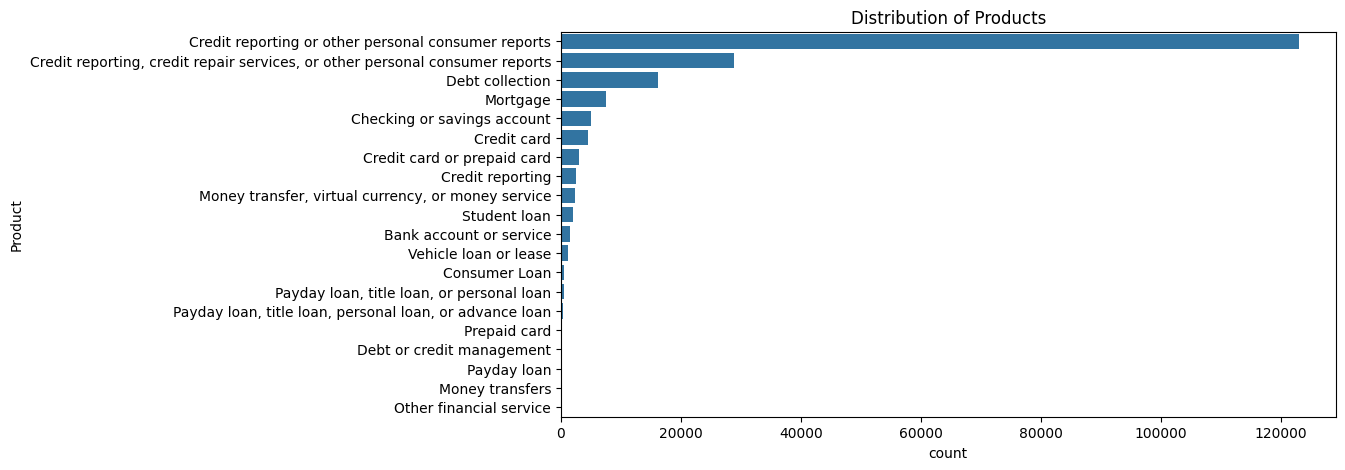

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index)
plt.title("Distribution of Products")
plt.show()


In [5]:
category_mapping = {
    'Credit reporting, credit repair services, or other': 0,
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Mortgage': 3
}

In [6]:
df['label'] = df['Product'].map(category_mapping)
df = df.dropna(subset=['label'])
df['label'] = df['label'].astype(int)

In [7]:
print("After mapping categories:")
print(df['label'].value_counts())

After mapping categories:
label
1    16137
3     7547
2      587
Name: count, dtype: int64


In [8]:
lemmatizer = WordNetLemmatizer()

In [9]:
def preprocess_text(text):
    text = str(text).lower()  
    text = re.sub(r'[^a-z\s]', '', text)  
    tokens = word_tokenize(text)  
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  
    return ' '.join(tokens)

In [10]:
import spacy
import re
import pandas as pd
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")
def preprocess_text_spacy(text):
    text = str(text).lower()  
    text = re.sub(r'[^a-z\s]', '', text) 
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]  
    return ' '.join(tokens)
df['cleaned_text'] = df['Issue'].apply(preprocess_text_spacy)
print(df[['Issue','cleaned_text']].head())


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 6.3 MB/s eta 0:00:02
     ---- ----------------------------------- 1.6/12.8 MB 3.9 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 4.0 MB/s eta 0:00:03
     --------- ------------------------------ 2.9/12.8 MB 3.5 MB/s eta 0:00:03
     ------------ --------------------------- 3.9/12.8 MB 3.7 MB/s eta 0:00:03
     -------------- ------------------------- 4.7/12.8 MB 3.7 MB/s eta 0:00:03
     ----------------- ---------------------- 5.5/12.8 MB 3.8 MB/s eta 0:00:02
     ------------------- -------------------- 6.3/12.8 MB 3.8 MB/s eta 0:00:02
     ---------------------- ----------------- 7.3/12.8 MB 3.8 MB/s eta 0:00:02
     ------------------------- -------------- 8.1/12.8 MB 3.8 MB/s eta 0:00:02
     --------------------------- ------------ 8.9/12.8 MB 3.


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                Issue              cleaned_text
5          Struggling to pay mortgage     struggle pay mortgage
32  Attempts to collect debt not owed  attempt collect debt owe
41  Attempts to collect debt not owed  attempt collect debt owe
53          Electronic communications  electronic communication
67              Communication tactics      communication tactic


In [16]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.9 MB 5.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/13.9 MB 4.3 MB/s eta 0:00:03
   ------- -------------------------------- 2.6/13.9 MB 4.2 MB/s eta 0:00:03
   --------- ------------------------------ 3.4/13.9 MB 4.0 MB/s eta 0:00:03
   ------------ --------------------------- 4.2/13.9 MB 4.1 MB/s eta 0:00:03
   -------------- ------------------------- 5.0/13.9 MB 4.0 MB/s eta 0:00:03
   ----------------- ---------------------- 6.0/13.9 MB 4.0 MB/s eta 0:00:02
   ------------------- -------------------- 6.8/13.9 MB 4.0 MB/s eta 0:00:02
   --------------------- ------------------ 7.6/13.9 MB 4.0 MB/s eta 0:00:02
   ------------------------ --------------- 8.4/13.9 MB 4.0 MB/s eta 0:00:02
   -------------------------- ------------- 9.2/13.9 MB 4.0 MB/s eta 0:00:02
   --


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['cleaned_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    print(f"{name} trained successfully!")


Naive Bayes trained successfully!
Logistic Regression trained successfully!
Random Forest trained successfully!


In [12]:
from sklearn.metrics import accuracy_score, classification_report
for name, model in models.items():
    y_pred = model.predict(X_test_vec)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


--- Naive Bayes ---
Accuracy: 0.9952626158599382
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3202
           2       0.94      1.00      0.97       134
           3       1.00      0.98      0.99      1519

    accuracy                           1.00      4855
   macro avg       0.98      0.99      0.99      4855
weighted avg       1.00      1.00      1.00      4855

--- Logistic Regression ---
Accuracy: 0.9991761071060762
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3202
           2       0.99      0.98      0.98       134
           3       1.00      1.00      1.00      1519

    accuracy                           1.00      4855
   macro avg       1.00      0.99      0.99      4855
weighted avg       1.00      1.00      1.00      4855

--- Random Forest ---
Accuracy: 0.9997940267765191
Classification Report:
          

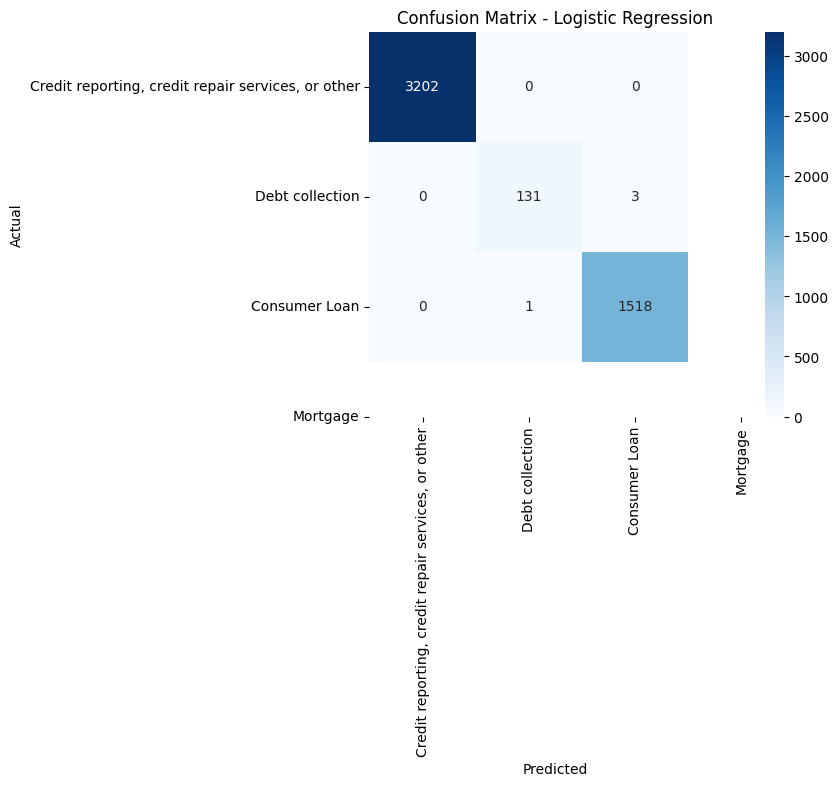

In [13]:

from sklearn.metrics import confusion_matrix
best_model = models["Logistic Regression"]
cm = confusion_matrix(y_test, best_model.predict(X_test_vec))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=category_mapping.keys(), yticklabels=category_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [14]:
new_complaints = [
    "I am receiving calls from debt collectors constantly",
    "There is incorrect information on my credit report"
]


In [15]:
new_complaints_cleaned = [preprocess_text_spacy(text) for text in new_complaints]


In [16]:
new_vec = vectorizer.transform(new_complaints_cleaned)


In [17]:
predictions = best_model.predict(new_vec)


In [18]:
inverse_mapping = {v: k for k, v in category_mapping.items()}
predicted_categories = [inverse_mapping[p] for p in predictions]


In [19]:

for i, text in enumerate(new_complaints):
    print(f"Complaint: {text}")
    print(f"Predicted Category: {predicted_categories[i]}\n")


Complaint: I am receiving calls from debt collectors constantly
Predicted Category: Debt collection

Complaint: There is incorrect information on my credit report
Predicted Category: Mortgage

